# Pandas 初学笔记（中文）

写在篇首：
* 本篇笔记是在观看 [Youtube Panda Tutorials](https://www.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&ab_channel=CoreySchafer) 视频之后所写，在此主要想以为个人方式对所学重新梳理
* `Pandas`是一个功能强大且成熟的库，且部分函数参数比较多，以下所记仅为个人常用，**适合入门**
* 下方的**思维导图**便于记忆和梳理
* 为保证每个小节都可单独运行，可能会多次出现**重复代码**

## 模块安装

要点：
* Windows命令面板中`pip install pandas`命令即可安装

In [1]:
import pandas as pd

print(pd.__version__)

1.3.5


## 数据创建

要点：
* 主要的数据类型`DataFrame`和`Series`
* 创建`DataFrame`的三种基本形式
* 由于`pandas`数据在`Jupyter`中行列数目受限，可调整显示区域：
```python
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)
```

### Series创建  

In [2]:
import pandas as pd

s = pd.Series(['xiaoming', 'xiaofang', 'xiaohong'])
print(type(s))
s

<class 'pandas.core.series.Series'>


0    xiaoming
1    xiaofang
2    xiaohong
dtype: object

### DataFrame创建

In [3]:
# 第一种方式
dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16]
}
df = pd.DataFrame(dic)
df

,name,age
0,xiaoming,12
1,xiaofang,14
2,xiaohong,16


In [4]:
# 第二种方式
dic = {
    'age':{'xiaoming':12, 'xiaofang':14, 'xiaohong':16}
}
df = pd.DataFrame(dic)
df

,age
xiaofang,14
xiaohong,16
xiaoming,12


In [5]:
# 第三种方式
dic = {
    'name':pd.Series(['xiaoming', 'xiaofang', 'xiaohong']),
    'age':pd.Series([12, 14, 16])
}
df = pd.DataFrame(dic)
df

,name,age
0,xiaoming,12
1,xiaofang,14
2,xiaohong,16


## index索引

要点：
* `loc`与`iloc`区别

In [6]:
import pandas as pd

dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16],
    'score':[88, 88, 92],
    'location':['shandong', 'henan', 'hunan']    
}
df = pd.DataFrame(dic)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


### 数据选择

In [7]:
# 基本单列索引
df['name']

0    xiaoming
1    xiaofang
2    xiaohong
Name: name, dtype: object

In [8]:
# 基本多列索引
df[['name', 'age']]

,name,age
0,xiaoming,12
1,xiaofang,14
2,xiaohong,16


In [9]:
# 单行索引
df.loc[0]

name        xiaoming
age               12
score             88
location    shandong
Name: 0, dtype: object

In [10]:
# 多行索引
df.loc[[0, 1, 2]]

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [11]:
# 非连续行列索引
df.loc[[1,2],['name','location']]

,name,location
1,xiaofang,henan
2,xiaohong,hunan


In [12]:
df.iloc[[1,2],[0,3]]

,name,location
1,xiaofang,henan
2,xiaohong,hunan


In [13]:
# 连续行列索引 
df.loc[1:2, 'name':'location']

,name,age,score,location
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [14]:
# 连续行列索引,注意这里是一个[1,2)区间
df.iloc[1:2, 0:3]

,name,age,score
1,xiaofang,14,88


### 设置列索引

In [15]:
# inplcae=True用于改变原数据
df.set_index('name', inplace=True)
df.loc['xiaoming']

age               12
score             88
location    shandong
Name: xiaoming, dtype: object

In [16]:
df.loc['xiaoming']

age               12
score             88
location    shandong
Name: xiaoming, dtype: object

### 重置索引

In [17]:
df.reset_index(inplace=False)

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


## 增

In [18]:
import pandas as pd

dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16],
    'score':[88, 88, 92],
    'location':['shandong', 'henan', 'hunan']    
}
df = pd.DataFrame(dic)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


### 按列增加

In [19]:
df['email'] = ['xiaoming@163.com', 'xiaofang@163.com', 'xiaohong@163.com']
df

,name,age,score,location,email
0,xiaoming,12,88,shandong,xiaoming@163.com
1,xiaofang,14,88,henan,xiaofang@163.com
2,xiaohong,16,92,hunan,xiaohong@163.com


In [20]:
df['location_email'] = df['location'] + '_' + df['email']
df

,name,age,score,location,email,location_email
0,xiaoming,12,88,shandong,xiaoming@163.com,shandong_xiaoming@163.com
1,xiaofang,14,88,henan,xiaofang@163.com,henan_xiaofang@163.com
2,xiaohong,16,92,hunan,xiaohong@163.com,hunan_xiaohong@163.com


In [21]:
df.insert(3, 'newcol', pd.Series([2,4,5], index=[1,2,3]))
df

,name,age,score,newcol,location,email,location_email
0,xiaoming,12,88,NaN,shandong,xiaoming@163.com,shandong_xiaoming@163.com
1,xiaofang,14,88,2.0,henan,xiaofang@163.com,henan_xiaofang@163.com
2,xiaohong,16,92,4.0,hunan,xiaohong@163.com,hunan_xiaohong@163.com


### 按行增加

In [22]:
df.loc[3, df.columns] = df.iloc[0, ::] + df.iloc[2, ::]
df

,name,age,score,newcol,location,email,location_email
0,xiaoming,12.0,88.0,NaN,shandong,xiaoming@163.com,shandong_xiaoming@163.com
1,xiaofang,14.0,88.0,2.0,henan,xiaofang@163.com,henan_xiaofang@163.com
2,xiaohong,16.0,92.0,4.0,hunan,xiaohong@163.com,hunan_xiaohong@163.com
3,xiaomingxiaohong,28.0,180.0,NaN,shandonghunan,xiaoming@163.comxiaohong@163.com,shandong_xiaoming@163.comhunan_xiaohong@163.com


In [23]:
df.append([pd.DataFrame([i], columns=['name']) for i in range(5)], ignore_index=True)

,name,age,score,newcol,location,email,location_email
0,xiaoming,12.0,88.0,NaN,shandong,xiaoming@163.com,shandong_xiaoming@163.com
1,xiaofang,14.0,88.0,2.0,henan,xiaofang@163.com,henan_xiaofang@163.com
2,xiaohong,16.0,92.0,4.0,hunan,xiaohong@163.com,hunan_xiaohong@163.com
3,xiaomingxiaohong,28.0,180.0,NaN,shandonghunan,xiaoming@163.comxiaohong@163.com,shandong_xiaoming@163.comhunan_xiaohong@163.com
4,0,NaN,NaN,NaN,NaN,NaN,NaN
5,1,NaN,NaN,NaN,NaN,NaN,NaN
6,2,NaN,NaN,NaN,NaN,NaN,NaN
7,3,NaN,NaN,NaN,NaN,NaN,NaN
8,4,NaN,NaN,NaN,NaN,NaN,NaN


## 删

In [24]:
import pandas as pd

dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16],
    'score':[88, 88, 92],
    'location':['shandong', 'henan', 'hunan']    
}
df = pd.DataFrame(dic)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [25]:
df.drop(columns=['score','location'])

,name,age
0,xiaoming,12
1,xiaofang,14
2,xiaohong,16


In [26]:
df.drop(index=[0, 1])

,name,age,score,location
2,xiaohong,16,92,hunan


In [27]:
filt = df['age']>12
df.drop(index=df[filt].index)

,name,age,score,location
0,xiaoming,12,88,shandong


## 改

要点：
* 常见两种列名的修改方法
* 更新值使用`.at`和`.iat`替换loc、iloc
* 掌握`apply`和`replace`函数使用

In [28]:
import pandas as pd

dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16],
    'score':[88, 88, 92],
    'location':['shandong', 'henan', 'hunan']    
}
df = pd.DataFrame(dic)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


### 修改列名

In [29]:
df.columns = [x.upper() for x in df.columns]
df

,NAME,AGE,SCORE,LOCATION
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [30]:
df.rename(columns={'NAME':'name', 'AGE':'age','SCORE':'score','LOCATION':'location'}, inplace=True)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


### pd.loc() 

In [31]:
df.loc[2] = ['hello', 24, 25, 'world']
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,hello,24,25,world


### pd.at()

In [32]:
df.at[2] = ['hello', 99, 99, 'world']
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,hello,99,99,world


### apply()

In [33]:
df['location'].apply(len)

0    8
1    5
2    5
Name: location, dtype: int64

In [34]:
df.apply(len, axis=0)

name        3
age         3
score       3
location    3
dtype: int64

In [35]:
df.apply(pd.Series.min)

name        hello
age            12
score          88
location    henan
dtype: object

In [36]:
def update_location(location):
    return location.upper()

df['location'].apply(update_location)

0    SHANDONG
1       HENAN
2       WORLD
Name: location, dtype: object

In [37]:
df['location'].apply(lambda x: x.upper())

0    SHANDONG
1       HENAN
2       WORLD
Name: location, dtype: object

In [38]:
df['location'].str.upper()

0    SHANDONG
1       HENAN
2       WORLD
Name: location, dtype: object

### applymap()

In [39]:
df.applymap(str)

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,hello,99,99,world


### 其他函数

In [40]:
df.loc[3,::] = ['hello','b','c','d']
df

,name,age,score,location
0,xiaoming,12.0,88.0,shandong
1,xiaofang,14.0,88.0,henan
2,hello,99.0,99.0,world
3,hello,b,c,d


In [41]:
df['name'].map({'hello':'HELLO', 'xiaofang':'fang'})

0      NaN
1     fang
2    HELLO
3    HELLO
Name: name, dtype: object

In [42]:
df['name'].replace({'hello':'HELLO', 'xiaofang':'fang'})

0    xiaoming
1        fang
2       HELLO
3       HELLO
Name: name, dtype: object

In [43]:
pd.concat([df['name'], df['age']], axis=1)

,name,age
0,xiaoming,12.0
1,xiaofang,14.0
2,hello,99.0
3,hello,b


## 查

要点：
* 掌握逻辑表达式中逻辑关系符：`|、&、~`
* 掌握数据筛选常用的`>、<、=`
* 全部包含和部分包含

In [44]:
import pandas as pd

dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16],
    'score':[88, 88, 92],
    'location':['shandong', 'henan', 'hunan']    
}
df = pd.DataFrame(dic)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [45]:
filt = df['age']==14
df[filt]

,name,age,score,location
1,xiaofang,14,88,henan


In [46]:
filt = (df['age']==14) | (df['age']==16)
df[filt]

,name,age,score,location
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [47]:
filt = ~(df['age']==14)
df.loc[filt, 'location']

0    shandong
2       hunan
Name: location, dtype: object

In [48]:
filt = df['age']>10
df.loc[filt]

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [49]:
df.loc[df['location'].str.contains('d', na=False)]

,name,age,score,location
0,xiaoming,12,88,shandong


In [50]:
df.loc[df['location'].isin(['shandong', 'hunan'])]

,name,age,score,location
0,xiaoming,12,88,shandong
2,xiaohong,16,92,hunan


## 排序

要点：
* 基本的`sort_index`和`sort_value`排序
* 默认升序排列，`ascending=False`改变排序

In [51]:
import pandas as pd

dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16],
    'score':[88, 88, 92],
    'location':['shandong', 'henan', 'hunan']    
}
df = pd.DataFrame(dic)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


### sort_index

In [52]:
df.set_index('age', inplace=True)
df.sort_index()

,name,score,location
age,,,
12,xiaoming,88,shandong
14,xiaofang,88,henan
16,xiaohong,92,hunan


### sort_value()

In [53]:
df.sort_values(by=['score', 'location'], ascending=[False, True], inplace=True)
df

,name,score,location
age,,,
16,xiaohong,92,hunan
14,xiaofang,88,henan
12,xiaoming,88,shandong


## 数据概览

In [54]:
import pandas as pd

dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16],
    'score':[88, 88, 92],
    'location':['shandong', 'henan', 'hunan']    
}
df = pd.DataFrame(dic)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [55]:
df.head(3)

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [56]:
df.tail(3)

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [57]:
df.describe()

,age,score
count,3.0,3.000000
mean,14.0,89.333333
std,2.0,2.309401
min,12.0,88.000000
25%,13.0,88.000000
50%,14.0,88.000000
75%,15.0,90.000000
max,16.0,92.000000


In [58]:
df['age'].median()

14.0

In [59]:
df['age'].count()

3

In [60]:
df['age'].value_counts()

12    1
14    1
16    1
Name: age, dtype: int64

In [61]:
df['age'].value_counts(normalize=True)

12    0.333333
14    0.333333
16    0.333333
Name: age, dtype: float64

## 分组

In [62]:
import pandas as pd

dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16],
    'score':[88, 88, 92],
    'location':['shandong', 'henan', 'hunan']    
}
df = pd.DataFrame(dic)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [63]:
score_grp = df.groupby(['score'])
score_grp

In [64]:
score_grp.get_group(88)

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan


In [65]:
score_grp['location'].value_counts(normalize=True).loc[88]

location
henan       0.5
shandong    0.5
Name: location, dtype: float64

In [66]:
score_grp['age'].median().loc[88]

13.0

In [67]:
score_grp['location'].apply(lambda x: x.str.contains('d').sum())

score
88    1
92    0
Name: location, dtype: int64

## 空值处理

In [68]:
import pandas as pd
import numpy as np

people = {
    'first': ['Corey', 'Jane', 'John', 'Chris', np.nan, None, 'NA'], 
    'last': ['Schafer', 'Doe', 'Doe', 'Schafer', np.nan, np.nan, 'Missing'], 
    'email': ['CoreyMSchafer@gmail.com', 'JaneDoe@email.com', 'JohnDoe@email.com', None, np.nan, 'Anonymous@email.com', 'NA'],
    'age': ['33', '55', '63', '36', None, None, 'Missing']
}
df = pd.DataFrame(people)
df.replace('NA', np.nan, inplace=True)
df.replace('Missing', np.nan, inplace=True)
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
4,NaN,NaN,NaN,None
5,None,NaN,Anonymous@email.com,None
6,NaN,NaN,NaN,NaN


In [69]:
df.dropna()

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63


In [70]:
df.dropna(axis='index', how='all', subset=['last', 'email'])

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,None,36
5,None,NaN,Anonymous@email.com,None


In [71]:
df.isna()

,first,last,email,age
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,True,False
4,True,True,True,True
5,True,True,False,True
6,True,True,True,True


In [72]:
df.fillna(0)

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33
1,Jane,Doe,JaneDoe@email.com,55
2,John,Doe,JohnDoe@email.com,63
3,Chris,Schafer,0,36
4,0,0,0,0
5,0,0,Anonymous@email.com,0
6,0,0,0,0


In [73]:
type(np.nan)

float

In [74]:
df['age'] = df['age'].astype(float)
df

,first,last,email,age
0,Corey,Schafer,CoreyMSchafer@gmail.com,33.0
1,Jane,Doe,JaneDoe@email.com,55.0
2,John,Doe,JohnDoe@email.com,63.0
3,Chris,Schafer,None,36.0
4,NaN,NaN,NaN,NaN
5,None,NaN,Anonymous@email.com,NaN
6,NaN,NaN,NaN,NaN


## 时间序列

In [75]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [76]:
data_path = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv'
d_pareser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv(data_path, date_parser=d_pareser)
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [77]:
df.shape

(23674, 7)

In [78]:
df.loc[0, 'Date']

'2020-03-13 08-PM'

In [79]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [80]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [81]:
df.loc[0, 'Date'].day_name()

'Friday'

In [82]:
# df.loc[0, 'Date'].day_name()
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [83]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [84]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [85]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [86]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [87]:
filt = (df['Date']>='2019')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [88]:
filt = ((df['Date']>='2019') & (df['Date']>='2019'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [89]:
filt = ((df['Date']>=pd.to_datetime('2018-01-01')) & (df['Date']<pd.to_datetime('2020-01-01')))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
19264,2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
19265,2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
19266,2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday
19267,2018-01-01 01:00:00,ETHUSD,734.59,735.10,730.01,730.02,1886624.01,Monday


In [90]:
df.set_index('Date', inplace=True)
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [91]:
df['2019']

C:\Users\shaohan.tian\AppData\Local\Temp\ipykernel_44848\1813439174.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019']


,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [92]:
df['2020-01':'2021-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [93]:
df['2020-01':'2021-02']['Close'].mean()

197.56875929102344

In [94]:
df['2020-01-01']['High'].max()

C:\Users\shaohan.tian\AppData\Local\Temp\ipykernel_44848\3485283041.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-01']['High'].max()


132.68

In [95]:
# 每天重新采样取最大值
highs = df['High'].resample('D').max()
highs['2020-01']

Date
2020-01-01    132.68
2020-01-02    130.19
2020-01-03    134.93
2020-01-04    135.75
2020-01-05    138.97
2020-01-06    144.51
2020-01-07    145.25
2020-01-08    148.00
2020-01-09    141.38
2020-01-10    145.81
2020-01-11    148.00
2020-01-12    146.60
2020-01-13    147.00
2020-01-14    170.83
2020-01-15    172.18
2020-01-16    167.28
2020-01-17    174.52
2020-01-18    179.32
2020-01-19    178.00
2020-01-20    169.30
2020-01-21    170.00
2020-01-22    171.05
2020-01-23    167.79
2020-01-24    164.21
2020-01-25    162.41
2020-01-26    167.59
2020-01-27    171.70
2020-01-28    176.50
2020-01-29    178.31
2020-01-30    186.89
2020-01-31    185.68
Freq: D, Name: High, dtype: float64

In [96]:
highs['2020-01-01']

132.68

In [97]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

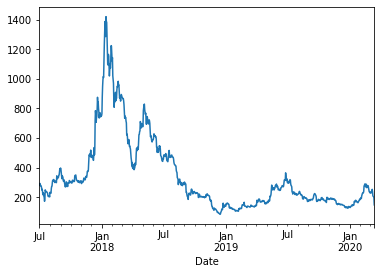

In [98]:
highs.plot()

In [99]:
df.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [100]:
df.resample('W').agg({'Close': ['mean','max'], 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

Close            High     Low        Volume
                  mean     max     max     min           sum
Date                                                        
2017-07-02  268.202162  292.54  293.73  253.23  8.084631e+07
2017-07-09  261.062083  282.58  285.00  231.25  2.246746e+08
2017-07-16  195.698393  238.47  240.33  130.26  5.017750e+08
2017-07-23  212.783750  245.55  249.40  153.25  7.221637e+08
2017-07-30  203.309524  229.96  229.99  178.03  2.657305e+08
...                ...     ...     ...     ...           ...
2020-02-16  255.198452  286.39  290.00  216.31  3.912867e+08
2020-02-23  265.321905  285.30  287.13  242.36  3.067838e+08
2020-03-01  236.373988  276.91  278.13  209.26  3.693920e+08
2020-03-08  229.817619  247.62  253.01  196.00  2.736569e+08
2020-03-15  176.332821  207.79  208.65   90.00  4.983998e+08

[142 rows x 5 columns]

## 导入导出

要点：
* 导出`CSV、Excel、JSON`的文件的关键参数
* 文件读入和导出的参数相同
* `read_csv`第一个参数可为`url`

In [101]:
import pandas as pd

dic = {
    'name':['xiaoming', 'xiaofang', 'xiaohong'],
    'age':[12, 14, 16],
    'score':[88, 88, 92],
    'location':['shandong', 'henan', 'hunan']    
}
df = pd.DataFrame(dic)
df

,name,age,score,location
0,xiaoming,12,88,shandong
1,xiaofang,14,88,henan
2,xiaohong,16,92,hunan


In [102]:
df.to_csv('data/test.csv', encoding='utf-8')

In [103]:
df.to_csv('data/sep_test.csv', encoding='utf-8', sep='\t')

In [104]:
df.to_excel('data/excel_test.xlsx', encoding='utf-8')

In [105]:
df.to_json('data/json_test', orient='records', lines=True)

## Installation and loading data

Display options settings
* pd.set_option('display.max_columns', 200)
* pd.set_option('display.max_rows', 100)
* pd.set_option('display.min_rows', 100)
* pd.set_option('display.expand_frame_repr', True)

In [627]:
import pandas as pd

pd.options.display.max_rows

85

In [628]:
# pandas display 20 columns and 10 rows by default
df = pd.read_csv('data/survey_results_public.csv')

In [629]:
df.head(80)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [630]:
df.shape

(88883, 85)

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [632]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 30)

In [633]:
df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [634]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


## Selecting Rows and Columns

In [635]:
import pandas as pd

df = pd.read_csv('data/survey_results_public.csv')
schema_df = pd.read_csv('data/survey_results_schema.csv')
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [636]:
dic = {
    'First':['A', 'B', 'C'],
    'Last':['a', 'b', 'c'],
    'age':[23, 42, 53]
}
df = pd.DataFrame(dic)
df

,First,Last,age
0,A,a,23
1,B,b,42
2,C,c,53


In [637]:
df['First']

0    A
1    B
2    C
Name: First, dtype: object

In [638]:
type(df['First'])

pandas.core.series.Series

In [639]:
df.First

0    A
1    B
2    C
Name: First, dtype: object

In [640]:
df.count

<bound method DataFrame.count of   First Last  age
0     A    a   23
1     B    b   42
2     C    c   53>

In [641]:
df[['First','Last']]

,First,Last
0,A,a
1,B,b
2,C,c


In [642]:
df.columns

Index(['First', 'Last', 'age'], dtype='object')

In [643]:
df.iloc[0]

First     A
Last      a
age      23
Name: 0, dtype: object

In [644]:
df.iloc[[1,2]]

,First,Last,age
1,B,b,42
2,C,c,53


In [645]:
df.iloc[[1,2],[1,2]]

,Last,age
1,b,42
2,c,53


In [646]:
df.loc[[0,1],'First']

0    A
1    B
Name: First, dtype: object

In [647]:
df = pd.read_csv('data/survey_results_public.csv')
df['Hobbyist'].value_counts()

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

In [648]:
df.loc[0:4, 'Hobbyist']

0    Yes
1     No
2    Yes
3     No
4    Yes
Name: Hobbyist, dtype: object

In [649]:
df.loc[0:4, 'Hobbyist':'Country']

,Hobbyist,OpenSourcer,OpenSource,Employment,Country
0,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom
1,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina
2,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand
3,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States
4,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine


## How to Set, Reset, and Use Indexes

In [650]:
import pandas as pd

dic = {
    'First':['A', 'B', 'C'],
    'Last':['a', 'b', 'c'],
    'age':[23, 42, 53]
}
df = pd.DataFrame(dic)
df

,First,Last,age
0,A,a,23
1,B,b,42
2,C,c,53


In [651]:
df.set_index('First',inplace=True)
df

,Last,age
First,,
A,a,23
B,b,42
C,c,53


In [652]:
df.index

Index(['A', 'B', 'C'], dtype='object', name='First')

In [653]:
df.loc['A']

Last     a
age     23
Name: A, dtype: object

In [654]:
df.iloc[0]

Last     a
age     23
Name: A, dtype: object

In [655]:
df.reset_index(inplace=True)
df

,First,Last,age
0,A,a,23
1,B,b,42
2,C,c,53


In [656]:
df = pd.read_csv('data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [657]:
df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')
df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [658]:
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='Column')
schema_df.head()

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
OpenSourcer,How often do you contribute to open source?
OpenSource,How do you feel about the quality of open sour...


In [659]:
schema_df.loc['OpenSource','QuestionText']

'How do you feel about the quality of open source software (OSS)?'

In [660]:
# reverse sort
# about sort, you can visit to  https://bbs.huaweicloud.com/blogs/300848
schema_df.sort_index(ascending=False)

,QuestionText
Column,
YearsCodePro,How many years have you coded professionally (...
YearsCode,"Including any education, how many years have y..."
WorkWeekHrs,"On average, how many hours per week do you work?"
WorkRemote,How often do you work remotely?
WorkPlan,How structured or planned is your work?
WorkLoc,Where would you prefer to work?
WorkChallenge,"Of these options, what are your greatest chall..."
WelcomeChange,"Compared to last year, how welcome do you feel..."
WebFrameWorkedWith,Which of the following web frameworks have you...


In [661]:
df.sort_values(by=['YearsCode','Age1stCode'])

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
824,I am a student who is learning to code,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...","Not employed, and not looking for work",India,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)",Mathematics or statistics,Taken an online course in programming or softw...,NaN,NaN,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Bash/Shell/PowerShell;Python,NaN,NaN,Linux;Slack,Android;Linux;Slack,NaN,NaN,TensorFlow;Torch/PyTorch,TensorFlow;Torch/PyTorch,Emacs;IPython / Jupyter;PyCharm;Vim,Linux-based,"Development;Outside of work, for personal proj...",NaN,Useful across many domains and could change ma...,Yes,SIGH,Yes,Reddit,In real life (in person),Handle,2012,Daily or almost daily,Find answers to specific questions;Pass the ti...,6-10 times per week,Stack Overflow was much faster,0-10 minutes,Yes,Less than once per month or monthly,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Tech...,22.0,Man,No,Bisexual,South Asian,Yes,Too long,Easy
1195,I am a student who is learning to code,Yes,Never,"OSS is, on average, of HIGHER quality than pro...","Not employed, and not looking for work",Israel,No,"Secondary school (e.g. American high school, G...",NaN,NaN,NaN,NaN,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#;Other(s):,C;C++;C#;Java;Python,Microsoft SQL Server;Oracle,Firebase;Microsoft SQL Server;Oracle,MacOS;Windows,MacOS,NaN,NaN,.NET,.NET Core;Unity 3D;Unreal Engine,Visual Studio;Visual Studio Code,Windows,NaN,NaN,NaN,Yes,Also Yes,No,Reddit,In real life (in person),NaN,I don't remember,A few times per month or weekly,Find answers to specific questions;Learn how t...,Less than once per week,Stack Overflow was much faster,11-30 minutes,Not sure / can't remember,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Somewhat less welcome now than last year,NaN,15.0,Man,No,Straight / Heterosexual,Middle Eastern;White or of European descent,No,Appropriate in length,Neither easy nor difficult
6660,I code primarily as a hobby,Yes,Never,The quality of OSS and closed source software ...,"Not employed, but looking for work",United States,No,"Secondary school (e.g. American high school, G...",NaN,"Taught yourself a new language, framework, or ...",NaN,"Developer, game or graphics",1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#;Python;Other(s):,C#;Python;Other(s):,NaN,NaN,Windows,Android;iOS;Windows,NaN,NaN,.NET;Unity 3D,.NET;TensorFlow;Torch/PyTorch;Unity 3D,Visual Studio;Visual Studio Code,Windows,I do not use containers,NaN,Useful across many domains 

## Using Conditionals to Filter Rows and Columns

In [662]:
import pandas as pd

import pandas as pd

dic = {
    'First':['A', 'B', 'C'],
    'Last':['a', 'b', 'c'],
    'age':[23, 42, 53]
}
df = pd.DataFrame(dic)
df

,First,Last,age
0,A,a,23
1,B,b,42
2,C,c,53


In [663]:
filt = df['First']=='A'
df[filt]

,First,Last,age
0,A,a,23


In [664]:
df.loc[filt, 'age']

0    23
Name: age, dtype: int64

In [665]:
#  add & | ~
df.loc[(df['age']==23) | (df['age']==42), 'Last']

0    a
1    b
Name: Last, dtype: object

In [666]:
df.loc[~((df['age']==23) | (df['age']==42)), 'Last']

2    c
Name: Last, dtype: object

In [667]:
df.loc[df['age']>40]

,First,Last,age
1,B,b,42
2,C,c,53


In [668]:
df.loc[df['First'].isin(['A','B'])]

,First,Last,age
0,A,a,23
1,B,b,42


In [669]:
df.loc[df['First'].str.contains('A', na=False)]

,First,Last,age
0,A,a,23


## Updating Rows and Columns - Modifying Data Within DataFrames

In [670]:
dic = {'first':['Corey', 'Schafer', 'John'],
       'last':['Schafer', 'Doe', 'Doe'],
       'email':['corey@gmail', 'John@gmail', 'John@hotmail']
}
df = pd.DataFrame(dic)
df

,first,last,email
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,John,Doe,John@hotmail


In [671]:
df.columns

Index(['first', 'last', 'email'], dtype='object')

In [672]:
df.columns = ['first name', 'sencond name', 'email']
df

,first name,sencond name,email
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,John,Doe,John@hotmail


In [673]:
df.columns = [x.upper() for x in df.columns]
df

,FIRST NAME,SENCOND NAME,EMAIL
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,John,Doe,John@hotmail


In [674]:
df.columns = df.columns.str.replace(' ','_')
df

,FIRST_NAME,SENCOND_NAME,EMAIL
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,John,Doe,John@hotmail


In [675]:
df.rename(columns={'FIRST_NAME':'First_name', 
                   'SENCOND_NAME':'Second_name',
                   'EMAIL':'email'}, inplace=True)
df

,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,John,Doe,John@hotmail


In [676]:
# change one row
df.loc[2] = ['John', 'Smith', 'Johnsmi']
df

,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,John,Smith,Johnsmi


In [677]:
# change some values in rows
df.loc[2, ['First_name', 'Second_name']] = ['change_first', 'change_last']
df

,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,change_first,change_last,Johnsmi


In [678]:
# change specific value(or .at) in one row
df.loc[1, 'First_name'] = 'AAAAAAA'
df

,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,AAAAAAA,Doe,John@gmail
2,change_first,change_last,Johnsmi


In [679]:
# somme warnings, there is no changes
filt= (df['email']=='John@gmail')
df[filt]['email'] = 'gmail.gmail'
df

C:\Users\shaohan.tian\AppData\Local\Temp\ipykernel_27436\4173364894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[filt]['email'] = 'gmail.gmail'


,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,AAAAAAA,Doe,John@gmail
2,change_first,change_last,Johnsmi


In [680]:
filt= (df['email']=='John@gmail')
df.loc[filt, 'email'] = 'gmail.gmail'
df

,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,AAAAAAA,Doe,gmail.gmail
2,change_first,change_last,Johnsmi


In [681]:
df['email'].str.lower()
df

,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,AAAAAAA,Doe,gmail.gmail
2,change_first,change_last,Johnsmi


In [682]:
df['email'] = df['email'].str.lower()
df

,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,AAAAAAA,Doe,gmail.gmail
2,change_first,change_last,johnsmi


In [683]:
# apply
df['email'].apply(len)

0    11
1    11
2     7
Name: email, dtype: int64

In [684]:
def update_email(email):
    return email.lower()

df['email'].apply(update_email)

0    corey@gmail
1    gmail.gmail
2        johnsmi
Name: email, dtype: object

In [685]:
df['email'] = df['email'].apply(update_email)
df

,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,AAAAAAA,Doe,gmail.gmail
2,change_first,change_last,johnsmi


In [686]:
df['email'] = df['email'].apply(lambda x: x.lower())
df

,First_name,Second_name,email
0,Corey,Schafer,corey@gmail
1,AAAAAAA,Doe,gmail.gmail
2,change_first,change_last,johnsmi


In [687]:
df.apply(len, axis=1)

0    3
1    3
2    3
dtype: int64

In [688]:
df.apply(pd.Series.min)

First_name         AAAAAAA
Second_name            Doe
email          corey@gmail
dtype: object

In [689]:
# working on Series
df.apply(lambda x: x.min())

First_name         AAAAAAA
Second_name            Doe
email          corey@gmail
dtype: object

### applymap

In [690]:
# applymap
df.applymap(len)

,First_name,Second_name,email
0,5,7,11
1,7,3,11
2,12,11,7


In [691]:
df.applymap(str.lower)

,First_name,Second_name,email
0,corey,schafer,corey@gmail
1,aaaaaaa,doe,gmail.gmail
2,change_first,change_last,johnsmi


In [692]:
df['First_name'].map({'Corey':'Chris','change_first':'lalala'})

0     Chris
1       NaN
2    lalala
Name: First_name, dtype: object

In [693]:
df['First_name'].replace({'Corey':'Chris','change_first':'lalala'})

0      Chris
1    AAAAAAA
2     lalala
Name: First_name, dtype: object

## Add/Remove Rows and Columns From DataFrames

In [694]:
dic = {'first':['Corey', 'Schafer', 'John'],
       'last':['Schafer', 'Doe', 'Doe'],
       'email':['corey@gmail', 'John@gmail', 'John@hotmail']
}
df = pd.DataFrame(dic)
df

,first,last,email
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,John,Doe,John@hotmail


In [695]:
df['first'] + '__' + df['last']

0    Corey__Schafer
1      Schafer__Doe
2         John__Doe
dtype: object

In [696]:
df['full_name'] = df['first'] + '__' + df['last']
df

,first,last,email,full_name
0,Corey,Schafer,corey@gmail,Corey__Schafer
1,Schafer,Doe,John@gmail,Schafer__Doe
2,John,Doe,John@hotmail,John__Doe


In [697]:
df.loc[3, df.columns] = df.iloc[0, ::] + df.iloc[1,::]
df

,first,last,email,full_name
0,Corey,Schafer,corey@gmail,Corey__Schafer
1,Schafer,Doe,John@gmail,Schafer__Doe
2,John,Doe,John@hotmail,John__Doe
3,CoreySchafer,SchaferDoe,corey@gmailJohn@gmail,Corey__SchaferSchafer__Doe


In [698]:
df.drop(columns=['first', 'last'], inplace=True)

In [699]:
df

,email,full_name
0,corey@gmail,Corey__Schafer
1,John@gmail,Schafer__Doe
2,John@hotmail,John__Doe
3,corey@gmailJohn@gmail,Corey__SchaferSchafer__Doe


In [700]:
df['full_name'] = df['full_name'].str.replace('__', ' ')
df

,email,full_name
0,corey@gmail,Corey Schafer
1,John@gmail,Schafer Doe
2,John@hotmail,John Doe
3,corey@gmailJohn@gmail,Corey SchaferSchafer Doe


In [701]:
df['full_name'].str.split(' ', expand=True)

,0,1,2
0,Corey,Schafer,None
1,Schafer,Doe,None
2,John,Doe,None
3,Corey,SchaferSchafer,Doe


In [702]:
df[['first', 'last']] = df['full_name'].str.split(' ', expand=True).loc[0,1]

In [703]:
df

,email,full_name,first,last
0,corey@gmail,Corey Schafer,Schafer,Schafer
1,John@gmail,Schafer Doe,Schafer,Schafer
2,John@hotmail,John Doe,Schafer,Schafer
3,corey@gmailJohn@gmail,Corey SchaferSchafer Doe,Schafer,Schafer


In [704]:
df.append({'first':'Tony'}, ignore_index=True)

,email,full_name,first,last
0,corey@gmail,Corey Schafer,Schafer,Schafer
1,John@gmail,Schafer Doe,Schafer,Schafer
2,John@hotmail,John Doe,Schafer,Schafer
3,corey@gmailJohn@gmail,Corey SchaferSchafer Doe,Schafer,Schafer
4,NaN,NaN,Tony,NaN


In [705]:
people = {'first':['Cory', 'Schaer', 'Jon'],
       'last':['Schafe', 'Do', 'oe'],
       'email':['coreygmail', 'Johngmail', 'Johnhotmail']
}
df2 = pd.DataFrame(people)
df2

,first,last,email
0,Cory,Schafe,coreygmail
1,Schaer,Do,Johngmail
2,Jon,oe,Johnhotmail


In [706]:
df = df.append(df2, ignore_index=True, sort=False)

In [707]:
# remove rows
df.drop(index=4)

,email,full_name,first,last
0,corey@gmail,Corey Schafer,Schafer,Schafer
1,John@gmail,Schafer Doe,Schafer,Schafer
2,John@hotmail,John Doe,Schafer,Schafer
3,corey@gmailJohn@gmail,Corey SchaferSchafer Doe,Schafer,Schafer
5,Johngmail,NaN,Schaer,Do
6,Johnhotmail,NaN,Jon,oe


In [708]:
filt = df['last'] == 'Schafer'
df.drop(index=df[filt].index)

,email,full_name,first,last
4,coreygmail,NaN,Cory,Schafe
5,Johngmail,NaN,Schaer,Do
6,Johnhotmail,NaN,Jon,oe


## Sorting data

In [709]:
dic = {'first':['Corey', 'Schafer', 'John'],
       'last':['Schafer', 'Doe', 'Doe'],
       'email':['corey@gmail', 'John@gmail', 'John@hotmail']
}
df = pd.DataFrame(dic)
df

,first,last,email
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,John,Doe,John@hotmail


In [711]:
df.sort_values(by='first', ascending=False)

,first,last,email
1,Schafer,Doe,John@gmail
2,John,Doe,John@hotmail
0,Corey,Schafer,corey@gmail


In [716]:
df.sort_values(by=['first', 'last'], ascending=[False, True], inplace=True)

In [714]:
df.sort_index()

,first,last,email
0,Corey,Schafer,corey@gmail
1,Schafer,Doe,John@gmail
2,John,Doe,John@hotmail


In [715]:
df['last'].sort_values()

1        Doe
2        Doe
0    Schafer
Name: last, dtype: object

In [720]:
df['value'] = [46,16232,4646]

In [725]:
df.nlargest(2, 'value')

,first,last,email,value
2,John,Doe,John@hotmail,16232
0,Corey,Schafer,corey@gmail,4646


In [726]:
df.nsmallest(2, 'value')

,first,last,email,value
1,Schafer,Doe,John@gmail,46
0,Corey,Schafer,corey@gmail,4646


## Grouping and Aggregating - Analyzing and Exploring Your Data

In [728]:
df = pd.read_csv('data/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [729]:
df['ConvertedComp'].head(15)

0          NaN
1          NaN
2       8820.0
3      61000.0
4          NaN
5     366420.0
6          NaN
7          NaN
8      95179.0
9      13293.0
10         NaN
11         NaN
12     90000.0
13     57060.0
14         NaN
Name: ConvertedComp, dtype: float64

In [730]:
df['ConvertedComp'].median()

57287.0

In [731]:
df.median()

C:\Users\shaohan.tian\AppData\Local\Temp\ipykernel_27436\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Respondent       44442.0
CompTotal        62000.0
ConvertedComp    57287.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

In [732]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [733]:
df['ConvertedComp'].describe()

count    5.582300e+04
mean     1.271107e+05
std      2.841523e+05
min      0.000000e+00
25%      2.577750e+04
50%      5.728700e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [734]:
df['ConvertedComp'].count()

55823

In [735]:
df['Hobbyist']

0        Yes
1         No
2        Yes
3         No
4        Yes
        ... 
88878    Yes
88879     No
88880     No
88881     No
88882    Yes
Name: Hobbyist, Length: 88883, dtype: object

In [736]:
df['Hobbyist'].value_counts()

Yes    71257
No     17626
Name: Hobbyist, dtype: int64

In [737]:
df['SocialMedia'].value_counts()

Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
WeChat 微信                     667
Snapchat                      628
VK ВКонта́кте                 603
Weibo 新浪微博                     56
Youku Tudou 优酷                 21
Hello                          19
Name: SocialMedia, dtype: int64

In [738]:
df['SocialMedia'].value_counts(normalize=True)

Reddit                      0.170233
YouTube                     0.163791
WhatsApp                    0.158071
Facebook                    0.156069
Twitter                     0.134988
Instagram                   0.074150
I don't use social media    0.065777
LinkedIn                    0.053306
WeChat 微信                   0.007899
Snapchat                    0.007437
VK ВКонта́кте               0.007141
Weibo 新浪微博                  0.000663
Youku Tudou 优酷              0.000249
Hello                       0.000225
Name: SocialMedia, dtype: float64

In [739]:
df['Country'].value_counts()

United States        20949
India                 9061
Germany               5866
United Kingdom        5737
Canada                3395
                     ...  
Tonga                    1
Timor-Leste              1
North Korea              1
Brunei Darussalam        1
Chad                     1
Name: Country, Length: 179, dtype: int64

In [742]:
counrty_grp = df.groupby(['Country'])

In [744]:
counrty_grp.get_group('United States')

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,NaN,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,NaN,NaN,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
12,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfied,NaN,NaN,NaN,I am not interested in new job opportunities,3-4 years ago,Complete a take-home project;Interview with pe...,Yes,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,90000.0,Yearly,90000.0,40.0,There is a schedule and/or spec (made by me or...,"Meetings;Non-work commitments (parenting, scho...",All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",5.0,"No, but I think we should",Developers and management have nearly equal in...,I have a great deal of influence,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Express;Vue.js,Node.js;Xamarin,Node.js;TensorFlow,Vi

In [746]:
filt = df['Country'] == 'India'
df.loc[filt]['SocialMedia'].value_counts()

WhatsApp                    2990
YouTube                     1820
LinkedIn                     955
Facebook                     841
Instagram                    822
Twitter                      542
Reddit                       473
I don't use social media     250
Snapchat                      23
Hello                          5
WeChat 微信                      5
VK ВКонта́кте                  4
Youku Tudou 优酷                 2
Weibo 新浪微博                     1
Name: SocialMedia, dtype: int64

In [747]:
counrty_grp['SocialMedia'].value_counts()

Country      SocialMedia             
Afghanistan  Facebook                    15
             YouTube                      9
             I don't use social media     6
             WhatsApp                     4
             Instagram                    1
                                         ..
Zimbabwe     Facebook                     3
             YouTube                      3
             Instagram                    2
             LinkedIn                     2
             Reddit                       1
Name: SocialMedia, Length: 1220, dtype: int64

In [749]:
counrty_grp['SocialMedia'].value_counts().loc['China']

SocialMedia
WeChat 微信                   403
YouTube                      53
Weibo 新浪微博                   42
I don't use social media     27
Twitter                      27
Reddit                       12
LinkedIn                     11
Facebook                      8
Instagram                     7
Youku Tudou 优酷                7
WhatsApp                      3
VK ВКонта́кте                 1
Name: SocialMedia, dtype: int64

In [751]:
counrty_grp['SocialMedia'].value_counts(normalize=True).loc['China']

SocialMedia
WeChat 微信                   0.670549
YouTube                     0.088186
Weibo 新浪微博                  0.069884
I don't use social media    0.044925
Twitter                     0.044925
Reddit                      0.019967
LinkedIn                    0.018303
Facebook                    0.013311
Instagram                   0.011647
Youku Tudou 优酷              0.011647
WhatsApp                    0.004992
VK ВКонта́кте               0.001664
Name: SocialMedia, dtype: float64

In [753]:
counrty_grp['ConvertedComp'].median().loc['Germany']

63016.0

In [754]:
counrty_grp['ConvertedComp'].median().agg(['median', 'mean'])

median    20400.000000
mean      36023.704969
Name: ConvertedComp, dtype: float64

In [756]:
counrty_grp['ConvertedComp'].agg(['median', 'mean']).loc['Canada']

median     68705.000000
mean      134018.564909
Name: Canada, dtype: float64

In [762]:
filt = df['Country']=='India'
df.loc[filt]['LanguageWorkedWith'].str.contains('Python')

7         True
9         True
14       False
49        True
64       False
         ...  
88808    False
88825     True
88852    False
88853     True
88864    False
Name: LanguageWorkedWith, Length: 9061, dtype: object

In [763]:
df.loc[filt]['LanguageWorkedWith'].str.contains('Python').sum()

3105

In [767]:
df.loc[filt]['LanguageWorkedWith']

7        Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
9                            C#;Go;JavaScript;Python;R;SQL
14       Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...
49       Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...
64                         Assembly;C;C++;C#;HTML/CSS;Java
                               ...                        
88808                                            Other(s):
88825                 Bash/Shell/PowerShell;Python;SQL;VBA
88852    Assembly;C;C++;HTML/CSS;Java;JavaScript;Object...
88853     HTML/CSS;Java;JavaScript;Python;Swift;TypeScript
88864        Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript
Name: LanguageWorkedWith, Length: 9061, dtype: object

In [768]:
counrty_grp['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

In [769]:
# combine series
s1 = counrty_grp['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())
s2 = df['Country'].value_counts()

In [783]:
python_df = pd.concat([s2, s1], axis=1, sort=False)
python_df

,Country,LanguageWorkedWith
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558
...,...,...
Tonga,1,0
Timor-Leste,1,1
North Korea,1,0
Brunei Darussalam,1,0


In [789]:
python_df = python_df.rename(columns={'Country':'changed'})

In [790]:
python_df.head(3)

,changed,LanguageWorkedWith
United States,20949,10083
India,9061,3105
Germany,5866,2451


In [798]:
python_df['changed'].sum()

88751

In [799]:
python_df['Percent'] = (python_df['changed']/python_df['changed'].sum())*100

In [801]:
python_df.head(5)

,changed,LanguageWorkedWith,Percent
United States,20949,10083,23.604241
India,9061,3105,10.209462
Germany,5866,2451,6.609503
United Kingdom,5737,2384,6.464153
Canada,3395,1558,3.825309


## Cleaning Data - Casting Datatypes and Handling Missing Values

In [823]:
import numpy as np

people = {'first':['Cory', np.nan, 'Jon'],
          'last':['Schafe', None, 'oe'],
          'email':['Alia', 'Johngmail', None],
          'age':[33,84,40]
}
df = pd.DataFrame(people)
df

,first,last,email,age
0,Cory,Schafe,Alia,33
1,NaN,None,Johngmail,84
2,Jon,oe,None,40


In [818]:
df.dropna()

,first,last,email,age
0,Cory,Schafe,Alia,33


In [819]:
df.dropna(axis='index', how='any')

,first,last,email,age
0,Cory,Schafe,Alia,33


In [820]:
df.dropna(axis='index', how='all')

,first,last,email,age
0,Cory,Schafe,Alia,33
1,NaN,None,Johngmail,84
2,Jon,oe,None,40


In [ ]:
df.dropna(axis='index', how='')

In [826]:
# choose filterd columns
df.dropna(axis='index', how='any', subset=['age'])

,first,last,email,age
0,Cory,Schafe,Alia,33
1,NaN,None,Johngmail,84
2,Jon,oe,None,40


In [830]:
df.replace('NA', np.nan, inplace=True)
df

,first,last,email,age
0,Cory,Schafe,Alia,33
1,NaN,NaN,Johngmail,84
2,Jon,oe,NaN,40


In [831]:
df.isna()

,first,last,email,age
0,False,False,False,False
1,True,True,False,False
2,False,False,True,False


In [832]:
df.fillna('MISSING')

,first,last,email,age
0,Cory,Schafe,Alia,33
1,MISSING,MISSING,Johngmail,84
2,Jon,oe,MISSING,40


In [833]:
df.dtypes

first    object
last     object
email    object
age       int64
dtype: object

In [834]:
df['age'].mean()

52.333333333333336

In [835]:
type(np.nan)

float

In [837]:
df['age'] = df['age'].astype(float)
df.dtypes

first     object
last      object
email     object
age      float64
dtype: object

In [839]:
# get unique value
df['first'].unique()

array(['Cory', nan, 'Jon'], dtype=object)

In [842]:
df['first'].replace(np.nan, 'hello',inplace=True)
df

,first,last,email,age
0,Cory,Schafe,Alia,33.0
1,hello,NaN,Johngmail,84.0
2,Jon,oe,NaN,40.0


## Working with Dates and Time Series Data

In [863]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [ ]:
data_path = 'https://raw.githubusercontent.com/CoreyMSchafer/code_snippets/master/Python/Pandas/10-Datetime-Timeseries/ETH_1h.csv'
d_pareser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv(data_path, date_parser=d_pareser)
df.head()

In [864]:
df.shape

(23674, 7)

In [865]:
df.loc[0, 'Date']

'2020-03-13 08-PM'

In [876]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [867]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [868]:
df.loc[0, 'Date'].day_name()

'Friday'

In [878]:
# df.loc[0, 'Date'].day_name()
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [880]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [881]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [882]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [883]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [890]:
filt = (df['Date']>='2019')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [892]:
filt = ((df['Date']>='2019') & (df['Date']>='2019'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [897]:
filt = ((df['Date']>=pd.to_datetime('2018-01-01')) & (df['Date']<pd.to_datetime('2020-01-01')))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
19264,2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
19265,2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
19266,2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday
19267,2018-01-01 01:00:00,ETHUSD,734.59,735.10,730.01,730.02,1886624.01,Monday


In [901]:
# df.set_index('Date', inplace=True)
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [902]:
df['2019']

C:\Users\shaohan.tian\AppData\Local\Temp\ipykernel_27436\1813439174.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019']


,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [903]:
df['2020-01':'2021-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [905]:
df['2020-01':'2021-02']['Close'].mean()

197.56875929102344

In [908]:
df['2020-01-01']['High'].max()

C:\Users\shaohan.tian\AppData\Local\Temp\ipykernel_27436\3485283041.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-01']['High'].max()


132.68

In [915]:
# 每天重新采样取最大值
highs = df['High'].resample('D').max()
highs['2020-01']

Date
2020-01-01    132.68
2020-01-02    130.19
2020-01-03    134.93
2020-01-04    135.75
2020-01-05    138.97
2020-01-06    144.51
2020-01-07    145.25
2020-01-08    148.00
2020-01-09    141.38
2020-01-10    145.81
2020-01-11    148.00
2020-01-12    146.60
2020-01-13    147.00
2020-01-14    170.83
2020-01-15    172.18
2020-01-16    167.28
2020-01-17    174.52
2020-01-18    179.32
2020-01-19    178.00
2020-01-20    169.30
2020-01-21    170.00
2020-01-22    171.05
2020-01-23    167.79
2020-01-24    164.21
2020-01-25    162.41
2020-01-26    167.59
2020-01-27    171.70
2020-01-28    176.50
2020-01-29    178.31
2020-01-30    186.89
2020-01-31    185.68
Freq: D, Name: High, dtype: float64

In [916]:
highs['2020-01-01']

132.68

In [917]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

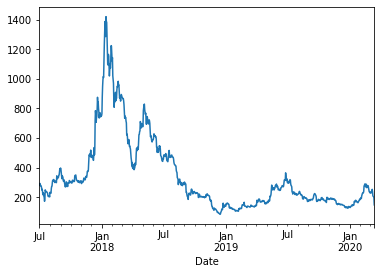

In [918]:
highs.plot()

In [921]:
df.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [923]:
df.resample('W').agg({'Close': ['mean','max'], 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

Close            High     Low        Volume
                  mean     max     max     min           sum
Date                                                        
2017-07-02  268.202162  292.54  293.73  253.23  8.084631e+07
2017-07-09  261.062083  282.58  285.00  231.25  2.246746e+08
2017-07-16  195.698393  238.47  240.33  130.26  5.017750e+08
2017-07-23  212.783750  245.55  249.40  153.25  7.221637e+08
2017-07-30  203.309524  229.96  229.99  178.03  2.657305e+08
...                ...     ...     ...     ...           ...
2020-02-16  255.198452  286.39  290.00  216.31  3.912867e+08
2020-02-23  265.321905  285.30  287.13  242.36  3.067838e+08
2020-03-01  236.373988  276.91  278.13  209.26  3.693920e+08
2020-03-08  229.817619  247.62  253.01  196.00  2.736569e+08
2020-03-15  176.332821  207.79  208.65   90.00  4.983998e+08

[142 rows x 5 columns]

## Reading/Writing Data to Different Sources - Excel, JSON, SQL, Etc

In [924]:
import pandas as pd

df = pd.read_csv('data/survey_results_public.csv', index_col='Respondent')
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='Column')
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

In [926]:
filt = (df['Country'] == 'India')
india_df = df.loc[filt]
india_df.head()

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...",NaN,"Developer, back-end;Engineer, site reliability",8,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,Bash/Shell/PowerShell;C;C++;Elixir;Erlang;Go;P...,Cassandra;Elasticsearch;MongoDB;MySQL;Oracle;R...,Cassandra;DynamoDB;Elasticsearch;Firebase;Mong...,AWS;Docker;Heroku;Linux;MacOS;Slack,Android;Arduino;AWS;Docker;Google Cloud Platfo...,Express;Flask;React.js;Spring,Django;Express;Flask;React.js;Vue.js,Hadoop;Node.js;Pandas,Ansible;Apache Spark;Chef;Hadoop;Node.js;Panda...,Atom;IntelliJ;IPython / Jupyter;PyCharm;Visual...,Linux-based,Development;Testing;Production;Outside of work...,NaN,Useful across many domains and could change ma...,Yes,SIGH,Yes,YouTube,In real life (in person),Handle,2012,A few times per week,Find answers to specific questions;Learn how t...,Less than once per week,Stack Overflow was slightly faster,11-30 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","Yes, definitely",A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,12,20,10,Slightly dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,NaN,No,"Languages, frameworks, and other technologies ...",NaN,INR,Indian rupee,950000.0,Yearly,13293.0,70.0,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,Far above average,"Yes, because I see value in code review",4.0,"Yes, it's part of our process",NaN,NaN,C#;Go;JavaScript;Python;R;SQL,C#;Go;JavaScript;Kotlin;Python;R;SQL,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Elasticsearch;MongoDB;Microsoft SQL Server,Linux;Windows,Android;Linux;Raspberry Pi;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...,Angular/Angular.js;ASP.NET;Django;Express;Flas...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,Yes,YouTube,Neither,Screen Name,NaN,Multiple times per day,Find answers to specific questions;Get a sense...,3-5 times per week,They were about the same,N

In [927]:
india_df.to_csv('data/csv_v1.csv')

In [928]:
india_df.to_csv('data/csv_v2.csv', sep='\t')

In [ ]:
test = pd.read_excel('data/modified.xlsx', index_clo='Respondent')

In [ ]:
test.head()

In [930]:
india_df.to_json('data/json_v1.json', orient='records', lines=True)
test = pd.read_json('data/json_v1.json', orient='records', lines=True)